In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [2]:
import tensorflow as tf
import keras

In [3]:
dataset_train = pd.read_csv('output_Result0.csv')


In [4]:
dataset_train

,F1,F2,F3,F4
0,401.203,1003.485,949.140,792.094
1,421.250,1021.578,925.547,788.015
2,425.719,1035.750,907.328,704.781
3,431.235,1042.703,900.469,766.844
4,433.390,1044.985,902.468,781.000
...,...,...,...,...
632,209.157,482.406,623.969,714.625
633,202.657,491.234,627.188,690.843
634,203.046,492.938,615.297,720.390
635,107.875,419.500,693.657,744.625


In [5]:
dataset_train=dataset_train.rolling(10).mean()

In [6]:
dataset_train

,F1,F2,F3,F4
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
632,186.1922,471.4906,650.2078,736.2451
633,186.3235,473.4359,651.3828,732.0997
634,186.9906,475.8813,652.2797,733.2419
635,192.5687,486.7563,647.7283,724.8138


In [7]:
dataset_train.head(12)

,F1,F2,F3,F4
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,434.3110,1037.8001,901.6749,741.1248


In [8]:
dataset_train=dataset_train.iloc[9:,:].values

In [9]:
dataset_train

array([[ 434.311 , 1037.8001,  901.6749,  741.1248],
       [ 439.2438, 1041.3719,  895.6578,  733.381 ],
       [ 439.9047, 1040.8891,  887.2797,  722.4185],
       ...,
       [ 186.9906,  475.8813,  652.2797,  733.2419],
       [ 192.5687,  486.7563,  647.7283,  724.8138],
       [ 189.6234,  481.9984,  642.6893,  723.8966]])

In [10]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset_train_scaled = sc.fit_transform(dataset_train)

In [11]:
dataset_train_scaled

array([[0.96737777, 0.90778795, 0.80694798, 0.37373319],
       [0.97863714, 0.91125169, 0.79699429, 0.35879472],
       [0.98014568, 0.91078349, 0.78313496, 0.3376471 ],
       ...,
       [0.4028562 , 0.36286962, 0.3943901 , 0.35852639],
       [0.4155885 , 0.37341561, 0.38686102, 0.34226784],
       [0.4088657 , 0.36880165, 0.37852534, 0.34049848]])

In [12]:
dataset_train_scaled

array([[0.96737777, 0.90778795, 0.80694798, 0.37373319],
       [0.97863714, 0.91125169, 0.79699429, 0.35879472],
       [0.98014568, 0.91078349, 0.78313496, 0.3376471 ],
       ...,
       [0.4028562 , 0.36286962, 0.3943901 , 0.35852639],
       [0.4155885 , 0.37341561, 0.38686102, 0.34226784],
       [0.4088657 , 0.36880165, 0.37852534, 0.34049848]])

In [13]:
dataset_train_result = pd.read_csv('SOH_RESULT12.csv')


In [14]:
dataset_train_result

,SOH
0,0.928244
1,0.923164
2,0.917675
3,0.917631
4,0.917323
...,...
632,0.677398
633,0.670526
634,0.666465
635,0.665487


In [15]:
dataset_train_result=dataset_train_result.rolling(10).mean()

In [16]:
dataset_train_result

,SOH
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
632,0.686977
633,0.683707
634,0.680679
635,0.677815


In [17]:
dataset_train_result.head(10)

,SOH
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,0.917701


In [18]:
dataset_train_result=dataset_train_result.iloc[9:,:].values

In [19]:
dataset_train_result

array([[0.91770118],
       [0.91610779],
       [0.91450152],
       [0.91342167],
       [0.91233057],
       [0.91072819],
       [0.90905045],
       [0.90742212],
       [0.9062877 ],
       [0.90518789],
       [0.90630852],
       [0.90744841],
       [0.90854719],
       [0.90914862],
       [0.90973227],
       [0.91088145],
       [0.91147766],
       [0.91208714],
       [0.9126322 ],
       [0.9126316 ],
       [0.91048415],
       [0.91070341],
       [0.91042974],
       [0.9096061 ],
       [0.90858091],
       [0.90727069],
       [0.90599129],
       [0.90439899],
       [0.9023522 ],
       [0.90086581],
       [0.89905556],
       [0.89458119],
       [0.89142686],
       [0.88909488],
       [0.88645091],
       [0.88357453],
       [0.88095694],
       [0.88149199],
       [0.88199975],
       [0.88171608],
       [0.88117336],
       [0.88040114],
       [0.87910614],
       [0.87779384],
       [0.8765234 ],
       [0.87522125],
       [0.87394335],
       [0.869

In [20]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_setY_scaled = sc.fit_transform(dataset_train_result)

In [21]:
training_setY_scaled

array([[0.84402423],
       [0.84008695],
       [0.83611787],
       [0.83344956],
       [0.83075345],
       [0.82679398],
       [0.82264829],
       [0.81862468],
       [0.81582152],
       [0.81310389],
       [0.81587298],
       [0.81868964],
       [0.82140471],
       [0.82289084],
       [0.82433306],
       [0.82717267],
       [0.82864591],
       [0.83015195],
       [0.83149877],
       [0.8314973 ],
       [0.82619095],
       [0.82673275],
       [0.82605649],
       [0.82402128],
       [0.82148804],
       [0.81825049],
       [0.8150891 ],
       [0.81115451],
       [0.80609691],
       [0.80242403],
       [0.79795091],
       [0.78689474],
       [0.7791004 ],
       [0.77333808],
       [0.76680483],
       [0.75969731],
       [0.75322924],
       [0.75455134],
       [0.75580603],
       [0.75510506],
       [0.75376401],
       [0.75185585],
       [0.7486559 ],
       [0.74541323],
       [0.74227398],
       [0.73905636],
       [0.73589867],
       [0.725

In [22]:
from sklearn.model_selection import train_test_split

# Split the data into training and remaining data
X_train, X_rem, y_train, y_rem = train_test_split(dataset_train_scaled, training_setY_scaled, test_size=0.3,shuffle=False, random_state=42)



In [23]:

# Split the remaining data into validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5,shuffle=False, random_state=42)

In [24]:
X_train


array([[0.96737777, 0.90778795, 0.80694798, 0.37373319],
       [0.97863714, 0.91125169, 0.79699429, 0.35879472],
       [0.98014568, 0.91078349, 0.78313496, 0.3376471 ],
       ...,
       [0.46714587, 0.62600255, 0.70547366, 0.35846986],
       [0.4637791 , 0.62283866, 0.70320174, 0.36007351],
       [0.45968124, 0.61891729, 0.70050831, 0.36243047]])

In [25]:
print(X_train.shape), print(y_train.shape),print(X_val.shape), print(y_val.shape),print(X_test.shape), print(y_test.shape)

(439, 4)
(439, 1)
(94, 4)
(94, 1)
(95, 4)
(95, 1)


(None, None, None, None, None, None)

In [26]:
X_train1 = X_train[:, 0:1]  
X_train2 = X_train[:, 1:2]  
X_train3 = X_train[:, 2:3]  
X_train4 = X_train[:, 3:] 

In [27]:
X_test1 = X_test[:, 0:1]  
X_test2 = X_test[:, 1:2]  
X_test3 = X_test[:, 2:3]  
X_test4 = X_test[:, 3:] 

In [28]:
X_val1 = X_val[:, 0:1]  
X_val2 = X_val[:, 1:2]  
X_val3 = X_val[:, 2:3]  
X_val4 = X_val[:, 3:] 

In [29]:
X_train1.shape

(439, 1)

In [30]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GRU
from keras.layers import Dropout
from keras.layers import Bidirectional
from keras.layers import Activation
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GRU, Dense,add, concatenate
from keras.callbacks import Callback
from tensorflow.keras.layers import Input, GRU, Dense,add, concatenate
from keras.callbacks import Callback
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization

In [31]:
input_shape_1 =(X_train1.shape[1], 1)
input_shape_2 = (X_train2.shape[1], 1)
input_shape_3 =(X_train3.shape[1], 1)
input_shape_4 = (X_train4.shape[1], 1)

In [32]:
input_shape_1

(1, 1)

In [33]:
input_1 = Input(shape=input_shape_1)
input_2 = Input(shape=input_shape_2)
input_3 = Input(shape=input_shape_3)
input_4 = Input(shape=input_shape_4)

In [34]:
print(input_2)

KerasTensor(type_spec=TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name='input_2'), name='input_2', description="created by layer 'input_2'")


In [35]:
input_1

<KerasTensor: shape=(None, 1, 1) dtype=float32 (created by layer 'input_1')>

In [36]:
initial_lr = 0.01
decay_rate = 0.99
decay_steps = 10000

class LearningRateUpdater(Callback):
    def __init__(self, initial_lr, decay_rate, decay_steps):
        super(LearningRateUpdater, self).__init__()
        self.initial_lr = initial_lr
        self.decay_rate = decay_rate
        self.decay_steps = decay_steps

    def on_epoch_begin(self, epoch, logs=None):
        lr = self.initial_lr * math.pow(self.decay_rate, (epoch + 1) // self.decay_steps)
        self.model.optimizer.lr.assign(lr)
        print("Learning rate updated to:", lr)


# Create the optimizer with the initial learning rate
optimizer = Adam(learning_rate=initial_lr)




# Create the learning rate updater callback
lr_updater_callback = LearningRateUpdater(initial_lr, decay_rate, decay_steps)



In [37]:
# def lr_scheduler(epoch, lr):
#     if epoch % 10000 == 0 and epoch > 0:
#         lr *= 0.99
#     return lr
# def lr_scheduler(epoch, lr):
        
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_lr, decay_steps=decay_steps, decay_rate=decay_rate, staircase=False)


#lr_scheduler_callback = LearningRateScheduler(lr_scheduler)

In [38]:
optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)

In [39]:
class LearningRateLogger(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        lr = self.model.optimizer.lr
        if isinstance(lr, tf.keras.optimizers.schedules.LearningRateSchedule):
            lr = lr(self.model.optimizer.iterations)
        print(f'\nLearning rate after epoch {epoch} is {lr:.4f}\n')

In [40]:
# optimizer = keras.optimizers.Adam(learning_rate=0.01)

In [41]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GRU, Dense,add,Lambda,Flatten

# Define the first parallel recurrent layer with return_sequences=True
rnn_1 = GRU(units=11)(input_1)
dropout1 = Dropout(rate=0.1)(rnn_1)

# Define the second parallel recurrent layer
rnn_2 = GRU(units=11)(input_2)
dropout2 = Dropout(rate=0.1)(rnn_2)

# Define the third parallel recurrent layer
rnn_3 = GRU(units=11)(input_3)
dropout3 = Dropout(rate=0.1)(rnn_3)

# Define the fourth parallel recurrent layer
rnn_4 = GRU(units=11)(input_4)
dropout4 = Dropout(rate=0.1)(rnn_4)

# Concatenate the outputs of the recurrent layers
merged = concatenate([dropout1, dropout2, dropout3, dropout4], axis=1)



# Flatten the merged output
flatten = Flatten()(merged)

# ...
activation_layer = Activation('tanh')(flatten)
dense1 = Dense(units=50, activation='tanh', kernel_regularizer=regularizers.l1(0.001))(activation_layer)
dense1 = BatchNormalization()(dense1)
dense2 = Dense(units=25, activation='relu', kernel_regularizer=regularizers.l1(0.001))(dense1)
dense2 = BatchNormalization()(dense2)



# Define the output layer
output = Dense(units=1, activation='sigmoid')(dense2)


# Create the model with the inputs and output
regressor = Model(inputs=[input_1, input_2,input_3, input_4], outputs=output)

# Compile the model with the desired optimizer, loss function, and metrics
regressor.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Train the model with the training data
result=regressor.fit([X_train1, X_train2,X_train3, X_train4], y_train, epochs=1000, batch_size=25,validation_data=([X_val1, X_val2,X_val3, X_val4], y_val),callbacks=[LearningRateLogger()])


Epoch 1/1000
 1/18 [>.............................] - ETA: 48s - loss: 0.6074 - mae: 0.3540
Learning rate after epoch 0 is 0.0100

18/18 [==============================] - 4s 51ms/step - loss: 0.4256 - mae: 0.1636 - val_loss: 0.3373 - val_mae: 0.1474
Epoch 2/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.3203 - mae: 0.1056
Learning rate after epoch 1 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.2602 - mae: 0.0752 - val_loss: 0.2246 - val_mae: 0.1455
Epoch 3/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.1960 - mae: 0.0428
Learning rate after epoch 2 is 0.0100

18/18 [==============================] - 0s 5ms/step - loss: 0.1613 - mae: 0.0721 - val_loss: 0.1419 - val_mae: 0.1476
Epoch 4/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.1221 - mae: 0.0803
Learning rate after epoch 3 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0960 - mae: 0.0618 - val_loss: 0.0963 - val_mae: 0.1525
Ep

Epoch 34/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0085 - mae: 0.0545
Learning rate after epoch 33 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0087 - mae: 0.0518 - val_loss: 0.0246 - val_mae: 0.1343
Epoch 35/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0070 - mae: 0.0390
Learning rate after epoch 34 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0082 - mae: 0.0462 - val_loss: 0.0363 - val_mae: 0.1508
Epoch 36/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0089 - mae: 0.0585
Learning rate after epoch 35 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0094 - mae: 0.0592 - val_loss: 0.0272 - val_mae: 0.1351
Epoch 37/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0067 - mae: 0.0326
Learning rate after epoch 36 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0071 - mae: 0.0408 - val_loss: 0.0174 - val_mae: 0.1

Epoch 67/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0182 - mae: 0.0791
Learning rate after epoch 66 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0140 - mae: 0.0575 - val_loss: 0.0299 - val_mae: 0.1304
Epoch 68/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0144 - mae: 0.0684
Learning rate after epoch 67 is 0.0100

18/18 [==============================] - 0s 5ms/step - loss: 0.0128 - mae: 0.0591 - val_loss: 0.0346 - val_mae: 0.1241
Epoch 69/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0137 - mae: 0.0661
Learning rate after epoch 68 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0107 - mae: 0.0520 - val_loss: 0.0478 - val_mae: 0.1473
Epoch 70/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0084 - mae: 0.0398
Learning rate after epoch 69 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0092 - mae: 0.0446 - val_loss: 0.0617 - val_mae: 0.1

Epoch 100/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0153 - mae: 0.0970
Learning rate after epoch 99 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0089 - mae: 0.0519 - val_loss: 0.0463 - val_mae: 0.1977
Epoch 101/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0091 - mae: 0.0523
Learning rate after epoch 100 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0086 - mae: 0.0513 - val_loss: 0.0254 - val_mae: 0.1221
Epoch 102/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0094 - mae: 0.0603
Learning rate after epoch 101 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0098 - mae: 0.0593 - val_loss: 0.0456 - val_mae: 0.2012
Epoch 103/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0134 - mae: 0.0864
Learning rate after epoch 102 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0106 - mae: 0.0620 - val_loss: 0.0308 - val_m

Epoch 133/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0094 - mae: 0.0541
Learning rate after epoch 132 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0077 - mae: 0.0486 - val_loss: 0.0178 - val_mae: 0.1050
Epoch 134/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0142 - mae: 0.0935
Learning rate after epoch 133 is 0.0100

18/18 [==============================] - 0s 5ms/step - loss: 0.0087 - mae: 0.0548 - val_loss: 0.0240 - val_mae: 0.1214
Epoch 135/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0059 - mae: 0.0319
Learning rate after epoch 134 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0076 - mae: 0.0441 - val_loss: 0.0207 - val_mae: 0.1121
Epoch 136/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0058 - mae: 0.0293
Learning rate after epoch 135 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0084 - mae: 0.0498 - val_loss: 0.0221 - val_

Epoch 166/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0057 - mae: 0.0233
Learning rate after epoch 165 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0081 - mae: 0.0460 - val_loss: 0.0462 - val_mae: 0.1977
Epoch 167/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0072 - mae: 0.0413
Learning rate after epoch 166 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0099 - mae: 0.0545 - val_loss: 0.0399 - val_mae: 0.1796
Epoch 168/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0098 - mae: 0.0583
Learning rate after epoch 167 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0088 - mae: 0.0488 - val_loss: 0.2749 - val_mae: 0.4946
Epoch 169/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0092 - mae: 0.0540
Learning rate after epoch 168 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0089 - mae: 0.0507 - val_loss: 0.1862 - val_

Epoch 199/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0080 - mae: 0.0448
Learning rate after epoch 198 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0097 - mae: 0.0544 - val_loss: 0.0156 - val_mae: 0.0746
Epoch 200/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0075 - mae: 0.0438
Learning rate after epoch 199 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0086 - mae: 0.0460 - val_loss: 0.0180 - val_mae: 0.0817
Epoch 201/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0072 - mae: 0.0339
Learning rate after epoch 200 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0090 - mae: 0.0492 - val_loss: 0.0793 - val_mae: 0.2479
Epoch 202/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0087 - mae: 0.0545
Learning rate after epoch 201 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0078 - mae: 0.0439 - val_loss: 0.1276 - val_

Epoch 232/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0113 - mae: 0.0637
Learning rate after epoch 231 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0100 - mae: 0.0557 - val_loss: 0.1378 - val_mae: 0.3580
Epoch 233/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0078 - mae: 0.0457
Learning rate after epoch 232 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0084 - mae: 0.0491 - val_loss: 0.0829 - val_mae: 0.2742
Epoch 234/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0070 - mae: 0.0361
Learning rate after epoch 233 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0071 - mae: 0.0424 - val_loss: 0.1628 - val_mae: 0.3825
Epoch 235/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0116 - mae: 0.0700
Learning rate after epoch 234 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0111 - mae: 0.0641 - val_loss: 0.3044 - val_

Epoch 265/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0066 - mae: 0.0390
Learning rate after epoch 264 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0084 - mae: 0.0478 - val_loss: 0.0501 - val_mae: 0.2118
Epoch 266/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0078 - mae: 0.0502
Learning rate after epoch 265 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0078 - mae: 0.0473 - val_loss: 0.0594 - val_mae: 0.2235
Epoch 267/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0098 - mae: 0.0643
Learning rate after epoch 266 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0087 - mae: 0.0531 - val_loss: 0.0534 - val_mae: 0.2194
Epoch 268/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0066 - mae: 0.0367
Learning rate after epoch 267 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0098 - mae: 0.0543 - val_loss: 0.0435 - val_

Epoch 298/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0094 - mae: 0.0572
Learning rate after epoch 297 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0093 - mae: 0.0532 - val_loss: 0.0135 - val_mae: 0.0916
Epoch 299/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0126 - mae: 0.0766
Learning rate after epoch 298 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0096 - mae: 0.0564 - val_loss: 0.0170 - val_mae: 0.1043
Epoch 300/1000
18/18 [==============================] - ETA: 0s - loss: 0.0081 - mae: 0.0490
Learning rate after epoch 299 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0081 - mae: 0.0490 - val_loss: 0.0258 - val_mae: 0.1264
Epoch 301/1000
18/18 [==============================] - ETA: 0s - loss: 0.0093 - mae: 0.0539
Learning rate after epoch 300 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0093 - mae: 0.0539 - val_loss: 0.0249 - val_

Epoch 331/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0155 - mae: 0.0964
Learning rate after epoch 330 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0098 - mae: 0.0594 - val_loss: 0.0547 - val_mae: 0.2136
Epoch 332/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0133 - mae: 0.0760
Learning rate after epoch 331 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0089 - mae: 0.0531 - val_loss: 0.0340 - val_mae: 0.1593
Epoch 333/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0079 - mae: 0.0487
Learning rate after epoch 332 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0076 - mae: 0.0444 - val_loss: 0.0367 - val_mae: 0.1766
Epoch 334/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0069 - mae: 0.0408
Learning rate after epoch 333 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0086 - mae: 0.0528 - val_loss: 0.0156 - val_

Epoch 364/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0079 - mae: 0.0468
Learning rate after epoch 363 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0086 - mae: 0.0500 - val_loss: 0.0200 - val_mae: 0.0943
Epoch 365/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0065 - mae: 0.0385
Learning rate after epoch 364 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0072 - mae: 0.0423 - val_loss: 0.0278 - val_mae: 0.1337
Epoch 366/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0062 - mae: 0.0380
Learning rate after epoch 365 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0080 - mae: 0.0480 - val_loss: 0.0047 - val_mae: 0.0088
Epoch 367/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0065 - mae: 0.0353
Learning rate after epoch 366 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0108 - mae: 0.0625 - val_loss: 0.0174 - val_

Epoch 397/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0072 - mae: 0.0455
Learning rate after epoch 396 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0087 - mae: 0.0526 - val_loss: 0.0581 - val_mae: 0.2290
Epoch 398/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0078 - mae: 0.0448
Learning rate after epoch 397 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0092 - mae: 0.0540 - val_loss: 0.0506 - val_mae: 0.2132
Epoch 399/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0150 - mae: 0.0935
Learning rate after epoch 398 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0107 - mae: 0.0600 - val_loss: 0.0328 - val_mae: 0.1625
Epoch 400/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0158 - mae: 0.0924
Learning rate after epoch 399 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0102 - mae: 0.0587 - val_loss: 0.0079 - val_

Epoch 430/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0116 - mae: 0.0726
Learning rate after epoch 429 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0078 - mae: 0.0426 - val_loss: 0.1362 - val_mae: 0.3492
Epoch 431/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0076 - mae: 0.0420
Learning rate after epoch 430 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0088 - mae: 0.0540 - val_loss: 0.1290 - val_mae: 0.3366
Epoch 432/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0059 - mae: 0.0332
Learning rate after epoch 431 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0077 - mae: 0.0463 - val_loss: 0.1118 - val_mae: 0.3117
Epoch 433/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0070 - mae: 0.0425
Learning rate after epoch 432 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0097 - mae: 0.0582 - val_loss: 0.0557 - val_

Epoch 463/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0095 - mae: 0.0582
Learning rate after epoch 462 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0079 - mae: 0.0482 - val_loss: 0.0109 - val_mae: 0.0702
Epoch 464/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0068 - mae: 0.0366
Learning rate after epoch 463 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0076 - mae: 0.0464 - val_loss: 0.0079 - val_mae: 0.0460
Epoch 465/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0143 - mae: 0.0848
Learning rate after epoch 464 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0083 - mae: 0.0493 - val_loss: 0.0065 - val_mae: 0.0428
Epoch 466/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0077 - mae: 0.0420
Learning rate after epoch 465 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0079 - mae: 0.0467 - val_loss: 0.0312 - val_


18/18 [==============================] - 0s 5ms/step - loss: 0.0087 - mae: 0.0534 - val_loss: 0.1207 - val_mae: 0.3248
Epoch 496/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0057 - mae: 0.0273
Learning rate after epoch 495 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0077 - mae: 0.0462 - val_loss: 0.0672 - val_mae: 0.2348
Epoch 497/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0115 - mae: 0.0766
Learning rate after epoch 496 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0089 - mae: 0.0536 - val_loss: 0.0264 - val_mae: 0.1262
Epoch 498/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0061 - mae: 0.0333
Learning rate after epoch 497 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0077 - mae: 0.0455 - val_loss: 0.0296 - val_mae: 0.1413
Epoch 499/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0071 - mae: 0.0368
Learning rate after epoch 49

Epoch 528/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0078 - mae: 0.0481
Learning rate after epoch 527 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0077 - mae: 0.0458 - val_loss: 0.0485 - val_mae: 0.1938
Epoch 529/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0071 - mae: 0.0376
Learning rate after epoch 528 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0092 - mae: 0.0529 - val_loss: 0.0133 - val_mae: 0.0887
Epoch 530/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0064 - mae: 0.0294
Learning rate after epoch 529 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0091 - mae: 0.0521 - val_loss: 0.0115 - val_mae: 0.0811
Epoch 531/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0112 - mae: 0.0729
Learning rate after epoch 530 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0090 - mae: 0.0535 - val_loss: 0.0094 - val_

Epoch 561/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0076 - mae: 0.0457
Learning rate after epoch 560 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0082 - mae: 0.0500 - val_loss: 0.0076 - val_mae: 0.0533
Epoch 562/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0067 - mae: 0.0365
Learning rate after epoch 561 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0107 - mae: 0.0608 - val_loss: 0.0448 - val_mae: 0.1941
Epoch 563/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0088 - mae: 0.0537
Learning rate after epoch 562 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0089 - mae: 0.0525 - val_loss: 0.0518 - val_mae: 0.2003
Epoch 564/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0072 - mae: 0.0436
Learning rate after epoch 563 is 0.0099

18/18 [==============================] - 0s 6ms/step - loss: 0.0117 - mae: 0.0605 - val_loss: 0.0152 - val_

18/18 [==============================] - 0s 5ms/step - loss: 0.0089 - mae: 0.0532 - val_loss: 0.0183 - val_mae: 0.1152
Epoch 594/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0120 - mae: 0.0713
Learning rate after epoch 593 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0083 - mae: 0.0478 - val_loss: 0.0157 - val_mae: 0.0907
Epoch 595/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0063 - mae: 0.0339
Learning rate after epoch 594 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0093 - mae: 0.0575 - val_loss: 0.0101 - val_mae: 0.0700
Epoch 596/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0066 - mae: 0.0383
Learning rate after epoch 595 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0086 - mae: 0.0497 - val_loss: 0.0869 - val_mae: 0.2818
Epoch 597/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0089 - mae: 0.0501
Learning rate after epoch 596

Epoch 626/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0136 - mae: 0.0847
Learning rate after epoch 625 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0090 - mae: 0.0522 - val_loss: 0.0194 - val_mae: 0.0882
Epoch 627/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0097 - mae: 0.0625
Learning rate after epoch 626 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0096 - mae: 0.0530 - val_loss: 0.0860 - val_mae: 0.2786
Epoch 628/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0132 - mae: 0.0803
Learning rate after epoch 627 is 0.0099

18/18 [==============================] - 0s 6ms/step - loss: 0.0088 - mae: 0.0509 - val_loss: 0.0334 - val_mae: 0.1642
Epoch 629/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0076 - mae: 0.0442
Learning rate after epoch 628 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0097 - mae: 0.0592 - val_loss: 0.0112 - val_

18/18 [==============================] - 0s 5ms/step - loss: 0.0087 - mae: 0.0516 - val_loss: 0.0448 - val_mae: 0.1664
Epoch 659/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0060 - mae: 0.0264
Learning rate after epoch 658 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0085 - mae: 0.0512 - val_loss: 0.0201 - val_mae: 0.0919
Epoch 660/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0113 - mae: 0.0751
Learning rate after epoch 659 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0095 - mae: 0.0560 - val_loss: 0.0183 - val_mae: 0.1022
Epoch 661/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0092 - mae: 0.0603
Learning rate after epoch 660 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0080 - mae: 0.0467 - val_loss: 0.0189 - val_mae: 0.1066
Epoch 662/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0080 - mae: 0.0508
Learning rate after epoch 661

Epoch 691/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0067 - mae: 0.0377
Learning rate after epoch 690 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0082 - mae: 0.0474 - val_loss: 0.1185 - val_mae: 0.3214
Epoch 692/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0086 - mae: 0.0529
Learning rate after epoch 691 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0083 - mae: 0.0506 - val_loss: 0.0716 - val_mae: 0.2319
Epoch 693/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0056 - mae: 0.0317
Learning rate after epoch 692 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0095 - mae: 0.0566 - val_loss: 0.1753 - val_mae: 0.3939
Epoch 694/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0087 - mae: 0.0499
Learning rate after epoch 693 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0094 - mae: 0.0517 - val_loss: 0.1029 - val_

Epoch 724/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0100 - mae: 0.0616
Learning rate after epoch 723 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0083 - mae: 0.0510 - val_loss: 0.0084 - val_mae: 0.0582
Epoch 725/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0059 - mae: 0.0304
Learning rate after epoch 724 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0091 - mae: 0.0533 - val_loss: 0.0062 - val_mae: 0.0334
Epoch 726/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0071 - mae: 0.0428
Learning rate after epoch 725 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0089 - mae: 0.0545 - val_loss: 0.0074 - val_mae: 0.0459
Epoch 727/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0075 - mae: 0.0466
Learning rate after epoch 726 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0082 - mae: 0.0488 - val_loss: 0.0088 - val_

Epoch 757/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0094 - mae: 0.0591
Learning rate after epoch 756 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0088 - mae: 0.0531 - val_loss: 0.0139 - val_mae: 0.0867
Epoch 758/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0120 - mae: 0.0758
Learning rate after epoch 757 is 0.0099

18/18 [==============================] - 0s 6ms/step - loss: 0.0089 - mae: 0.0519 - val_loss: 0.0155 - val_mae: 0.0782
Epoch 759/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0061 - mae: 0.0313
Learning rate after epoch 758 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0095 - mae: 0.0568 - val_loss: 0.0089 - val_mae: 0.0527
Epoch 760/1000
17/18 [===========================>..] - ETA: 0s - loss: 0.0079 - mae: 0.0460
Learning rate after epoch 759 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0079 - mae: 0.0462 - val_loss: 0.0346 - val_

Epoch 790/1000
16/18 [=========================>....] - ETA: 0s - loss: 0.0087 - mae: 0.0505
Learning rate after epoch 789 is 0.0099

18/18 [==============================] - 0s 6ms/step - loss: 0.0086 - mae: 0.0499 - val_loss: 0.0141 - val_mae: 0.0887
Epoch 791/1000
15/18 [========================>.....] - ETA: 0s - loss: 0.0075 - mae: 0.0460
Learning rate after epoch 790 is 0.0099

18/18 [==============================] - 0s 6ms/step - loss: 0.0082 - mae: 0.0490 - val_loss: 0.0080 - val_mae: 0.0518
Epoch 792/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0105 - mae: 0.0639
Learning rate after epoch 791 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0098 - mae: 0.0557 - val_loss: 0.2628 - val_mae: 0.4790
Epoch 793/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0172 - mae: 0.1039
Learning rate after epoch 792 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0104 - mae: 0.0596 - val_loss: 0.2064 - val_

18/18 [==============================] - 0s 5ms/step - loss: 0.0081 - mae: 0.0476 - val_loss: 0.0112 - val_mae: 0.0792
Epoch 823/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0072 - mae: 0.0408
Learning rate after epoch 822 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0117 - mae: 0.0671 - val_loss: 0.0194 - val_mae: 0.1119
Epoch 824/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0098 - mae: 0.0636
Learning rate after epoch 823 is 0.0099

18/18 [==============================] - 0s 6ms/step - loss: 0.0080 - mae: 0.0482 - val_loss: 0.0151 - val_mae: 0.0917
Epoch 825/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0076 - mae: 0.0450
Learning rate after epoch 824 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0093 - mae: 0.0548 - val_loss: 0.0219 - val_mae: 0.0977
Epoch 826/1000
18/18 [==============================] - ETA: 0s - loss: 0.0089 - mae: 0.0545
Learning rate after epoch 825

Epoch 855/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0075 - mae: 0.0476
Learning rate after epoch 854 is 0.0098

18/18 [==============================] - 0s 5ms/step - loss: 0.0095 - mae: 0.0573 - val_loss: 0.0734 - val_mae: 0.2557
Epoch 856/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0084 - mae: 0.0495
Learning rate after epoch 855 is 0.0098

18/18 [==============================] - 0s 5ms/step - loss: 0.0101 - mae: 0.0609 - val_loss: 0.0360 - val_mae: 0.1756
Epoch 857/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0087 - mae: 0.0553
Learning rate after epoch 856 is 0.0098

18/18 [==============================] - 0s 5ms/step - loss: 0.0075 - mae: 0.0445 - val_loss: 0.0198 - val_mae: 0.1129
Epoch 858/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0076 - mae: 0.0498
Learning rate after epoch 857 is 0.0098

18/18 [==============================] - 0s 5ms/step - loss: 0.0090 - mae: 0.0527 - val_loss: 0.0071 - val_

Epoch 888/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0074 - mae: 0.0444
Learning rate after epoch 887 is 0.0098

18/18 [==============================] - 0s 5ms/step - loss: 0.0098 - mae: 0.0560 - val_loss: 0.0081 - val_mae: 0.0471
Epoch 889/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0101 - mae: 0.0671
Learning rate after epoch 888 is 0.0098

18/18 [==============================] - 0s 5ms/step - loss: 0.0086 - mae: 0.0546 - val_loss: 0.0117 - val_mae: 0.0689
Epoch 890/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0062 - mae: 0.0350
Learning rate after epoch 889 is 0.0098

18/18 [==============================] - 0s 5ms/step - loss: 0.0086 - mae: 0.0526 - val_loss: 0.0364 - val_mae: 0.1695
Epoch 891/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0073 - mae: 0.0431
Learning rate after epoch 890 is 0.0098

18/18 [==============================] - 0s 5ms/step - loss: 0.0102 - mae: 0.0561 - val_loss: 0.0061 - val_

18/18 [==============================] - 0s 5ms/step - loss: 0.0095 - mae: 0.0543 - val_loss: 0.0362 - val_mae: 0.1664
Epoch 921/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0074 - mae: 0.0458
Learning rate after epoch 920 is 0.0098

18/18 [==============================] - 0s 5ms/step - loss: 0.0081 - mae: 0.0479 - val_loss: 0.1946 - val_mae: 0.4166
Epoch 922/1000
18/18 [==============================] - ETA: 0s - loss: 0.0075 - mae: 0.0422
Learning rate after epoch 921 is 0.0098

18/18 [==============================] - 0s 6ms/step - loss: 0.0075 - mae: 0.0422 - val_loss: 0.0195 - val_mae: 0.1139
Epoch 923/1000
18/18 [==============================] - ETA: 0s - loss: 0.0126 - mae: 0.0673
Learning rate after epoch 922 is 0.0098

18/18 [==============================] - 0s 5ms/step - loss: 0.0126 - mae: 0.0673 - val_loss: 0.2423 - val_mae: 0.4612
Epoch 924/1000
18/18 [==============================] - ETA: 0s - loss: 0.0093 - mae: 0.0530
Learning rate after epoch 923

Epoch 953/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0067 - mae: 0.0336
Learning rate after epoch 952 is 0.0098

18/18 [==============================] - 0s 5ms/step - loss: 0.0100 - mae: 0.0570 - val_loss: 0.0070 - val_mae: 0.0465
Epoch 954/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0072 - mae: 0.0480
Learning rate after epoch 953 is 0.0098

18/18 [==============================] - 0s 5ms/step - loss: 0.0086 - mae: 0.0525 - val_loss: 0.0099 - val_mae: 0.0577
Epoch 955/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0059 - mae: 0.0341
Learning rate after epoch 954 is 0.0098

18/18 [==============================] - 0s 5ms/step - loss: 0.0089 - mae: 0.0538 - val_loss: 0.0058 - val_mae: 0.0299
Epoch 956/1000
18/18 [==============================] - ETA: 0s - loss: 0.0089 - mae: 0.0511
Learning rate after epoch 955 is 0.0098

18/18 [==============================] - 0s 5ms/step - loss: 0.0089 - mae: 0.0511 - val_loss: 0.0055 - val_

18/18 [==============================] - 0s 5ms/step - loss: 0.0096 - mae: 0.0588 - val_loss: 0.0182 - val_mae: 0.0851
Epoch 986/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0060 - mae: 0.0345
Learning rate after epoch 985 is 0.0098

18/18 [==============================] - 0s 5ms/step - loss: 0.0082 - mae: 0.0467 - val_loss: 0.0080 - val_mae: 0.0524
Epoch 987/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0167 - mae: 0.0948
Learning rate after epoch 986 is 0.0098

18/18 [==============================] - 0s 5ms/step - loss: 0.0094 - mae: 0.0581 - val_loss: 0.0045 - val_mae: 0.0070
Epoch 988/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0065 - mae: 0.0393
Learning rate after epoch 987 is 0.0098

18/18 [==============================] - 0s 5ms/step - loss: 0.0096 - mae: 0.0574 - val_loss: 0.0160 - val_mae: 0.0828
Epoch 989/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0177 - mae: 0.0996
Learning rate after epoch 988

In [42]:
regressor.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1, 1)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1, 1)]       0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 1, 1)]       0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 1, 1)]       0           []                               
                                                                                              

In [43]:
# Predict on the training data
trainPredict = regressor.predict([X_train1, X_train2, X_train3, X_train4])

14/14 [==============================] - 2s 1ms/step


In [44]:
trainPredict.shape

(439, 1)

In [45]:
trainPredict

array([[0.8298536 ],
       [0.8308983 ],
       [0.82540244],
       [0.82572323],
       [0.82585186],
       [0.8259545 ],
       [0.8245999 ],
       [0.822877  ],
       [0.8223266 ],
       [0.82161695],
       [0.8203436 ],
       [0.82077897],
       [0.8276254 ],
       [0.8290206 ],
       [0.8298263 ],
       [0.8301886 ],
       [0.8306108 ],
       [0.8306706 ],
       [0.83022   ],
       [0.83007133],
       [0.8281854 ],
       [0.8267976 ],
       [0.8239735 ],
       [0.8223821 ],
       [0.82074857],
       [0.81806254],
       [0.8155449 ],
       [0.8132726 ],
       [0.8107852 ],
       [0.8074728 ],
       [0.803406  ],
       [0.7965367 ],
       [0.79086643],
       [0.7842217 ],
       [0.7773431 ],
       [0.77301824],
       [0.76808774],
       [0.76256645],
       [0.7558036 ],
       [0.7529631 ],
       [0.75576395],
       [0.757584  ],
       [0.75785184],
       [0.75697535],
       [0.7557289 ],
       [0.7526218 ],
       [0.75051415],
       [0.747

In [46]:
# Predict on the test data
testPredict = regressor.predict([X_test1, X_test2, X_test3, X_test4])

3/3 [==============================] - 0s 2ms/step


In [47]:
valPredict = regressor.predict([X_val1, X_val2,X_val3, X_val4])

3/3 [==============================] - 0s 3ms/step


In [48]:
testPredict.shape

(95, 1)

In [49]:
RMSE = math.sqrt(mean_squared_error(y_val,valPredict))
print('Train RMSE: %.2f' % (RMSE))


Train RMSE: 0.05


In [50]:
MAE = math.sqrt(mean_absolute_error(y_val,valPredict))
print('Test MAE: %.2f' % (MAE))

Test MAE: 0.22


In [51]:
#testPredict

In [52]:
np.set_printoptions(precision=6)
print(np.concatenate((testPredict.reshape(len(testPredict),1), y_test.reshape(len(y_test),1)),1))

[[0.601068 0.618226]
 [0.60035  0.616004]
 [0.597037 0.611976]
 [0.591915 0.606466]
 [0.586157 0.600399]
 [0.579252 0.59468 ]
 [0.57294  0.588161]
 [0.575522 0.599026]
 [0.586782 0.607449]
 [0.59719  0.614321]
 [0.60654  0.620085]
 [0.607427 0.618894]
 [0.608844 0.618589]
 [0.612977 0.617772]
 [0.618487 0.617245]
 [0.627769 0.616607]
 [0.63252  0.626267]
 [0.623854 0.615608]
 [0.613591 0.605407]
 [0.607858 0.594143]
 [0.601751 0.584187]
 [0.59447  0.571555]
 [0.587811 0.560286]
 [0.575925 0.549715]
 [0.566851 0.539831]
 [0.558461 0.530674]
 [0.550799 0.511971]
 [0.544749 0.495426]
 [0.529885 0.481608]
 [0.51449  0.470458]
 [0.499567 0.464694]
 [0.487599 0.459712]
 [0.474676 0.452987]
 [0.464478 0.447083]
 [0.458352 0.44105 ]
 [0.4522   0.434763]
 [0.445264 0.428739]
 [0.43824  0.423982]
 [0.431951 0.418628]
 [0.426045 0.412638]
 [0.420052 0.402674]
 [0.413742 0.392628]
 [0.408636 0.384978]
 [0.401453 0.377099]
 [0.39197  0.369881]
 [0.382684 0.368531]
 [0.375248 0.365946]
 [0.368654 0.

In [53]:
RMSE = math.sqrt(mean_squared_error(y_train,trainPredict))
print('Train RMSE: %.2f' % (RMSE))

RMSE = math.sqrt(mean_squared_error(y_test,testPredict))
print('Test RMSE: %.2f' % (RMSE))

Train RMSE: 0.04
Test RMSE: 0.02


In [54]:
mse=mean_squared_error(y_train,trainPredict)
print(mse)

mse=mean_squared_error(y_test,testPredict)
mse

0.001318536480168418


0.0005144523578225843

In [71]:
mse=mean_squared_error(y_val,valPredict)
mse

0.002684150138490828

In [55]:
from sklearn.metrics import mean_absolute_error
MAE = math.sqrt(mean_absolute_error(y_train,trainPredict))
print('Train MAE: %.2f' % (MAE))

Train MAE: 0.17


In [56]:
from sklearn.metrics import mean_absolute_error
MAE = math.sqrt(mean_absolute_error(y_test,testPredict))
print('Test MAE: %.2f' % (MAE))

Test MAE: 0.14


In [57]:
r2_score(y_train, trainPredict)

0.9801043499884434

In [58]:
r2_score(y_val, valPredict)

0.9054122735273364

In [59]:
r2_score(y_test, testPredict)

0.9681678043597348

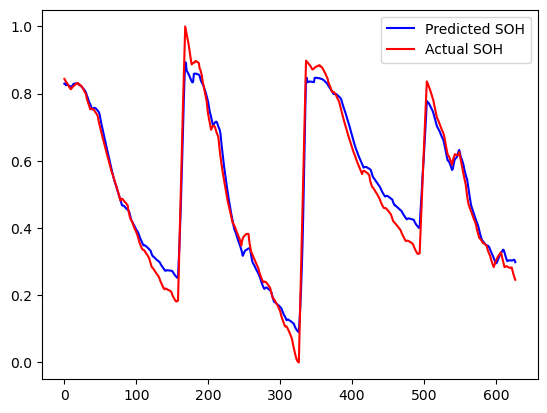

In [60]:
combined_datap = np.concatenate((trainPredict,valPredict, testPredict), axis=0)
combined_data = np.concatenate((y_train,y_val,y_test), axis=0)
plt.plot(combined_datap, color = 'blue', label = 'Predicted SOH')
plt.plot(combined_data, color = 'red', label = 'Actual SOH')

plt.legend()
plt.show()

In [92]:
X_data = np.arange(439, 628)


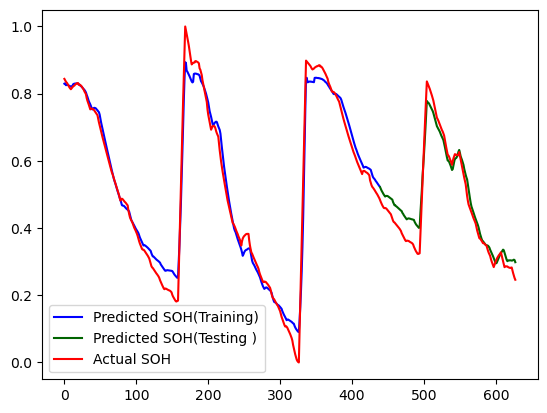

In [102]:
X_data = np.arange(439, 628)
                   
combined_datap = np.concatenate((trainPredict,valPredict, testPredict), axis=0)
combined_data = np.concatenate((y_train,y_val,y_test), axis=0)
plt.plot(trainPredict,color = 'blue', label = 'Predicted SOH(Training)')
z=np.concatenate((valPredict,testPredict), axis=0)
plt.plot( X_data,z,color = 'darkgreen', label = 'Predicted SOH(Testing )')
plt.plot(combined_data, color = 'red', label = 'Actual SOH')

plt.legend()
plt.show()

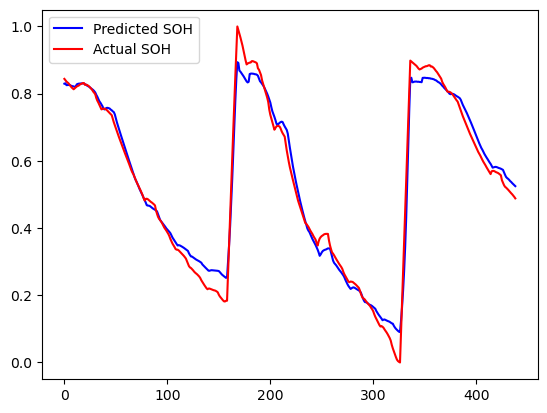

In [61]:
plt.plot(trainPredict, color = 'blue', label = 'Predicted SOH')
plt.plot(y_train, color = 'red', label = 'Actual SOH')

plt.legend()
plt.show()

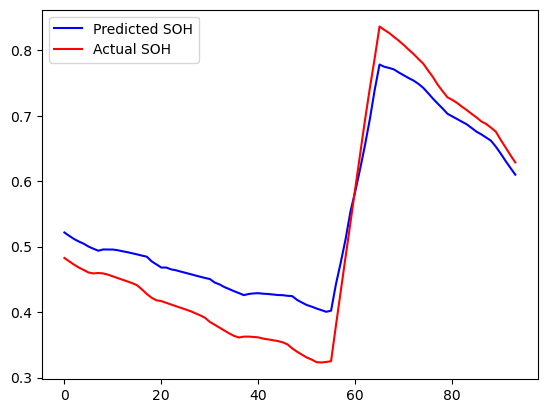

In [62]:
plt.plot(valPredict, color = 'blue', label = 'Predicted SOH')
plt.plot(y_val, color = 'red', label = 'Actual SOH')

plt.legend()
plt.show()

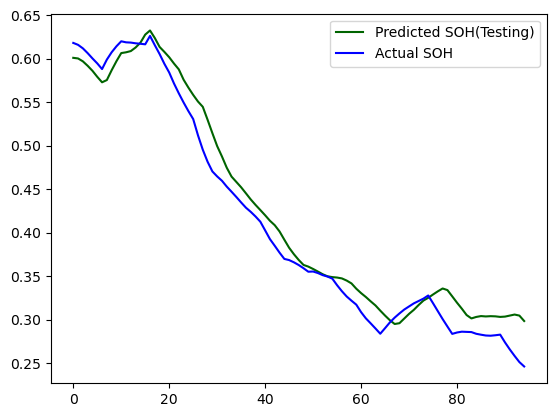

In [106]:
plt.plot(testPredict, color = 'darkgreen', label = 'Predicted SOH(Testing)')
plt.plot(y_test, color = 'blue', label = 'Actual SOH')

plt.legend()
plt.show()

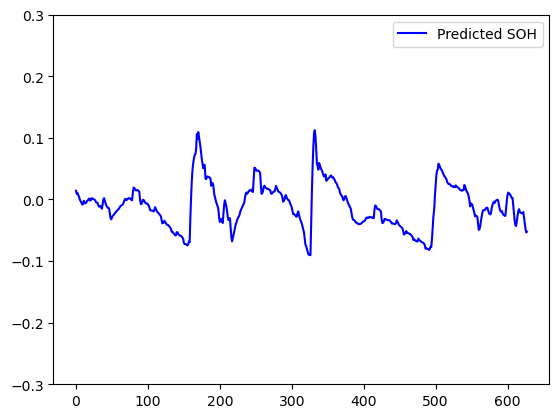

In [120]:

plt.plot(combined_data-combined_datap, color = 'blue', label = 'Predicted SOH')
yticks_positions = [-0.3, -0.2,-0.1,0.0 ,0.1,0.2,0.3]
#yticks_labels = ['0%', '20%', '40%', '60%', '80%', '100%']

# Apply the yticks
#plt.yticks(yticks_positions, yticks_labels)
plt.yticks(yticks_positions)

plt.legend()
plt.show()  

In [69]:
r2_score(combined_data, combined_datap)

0.9744808708575012

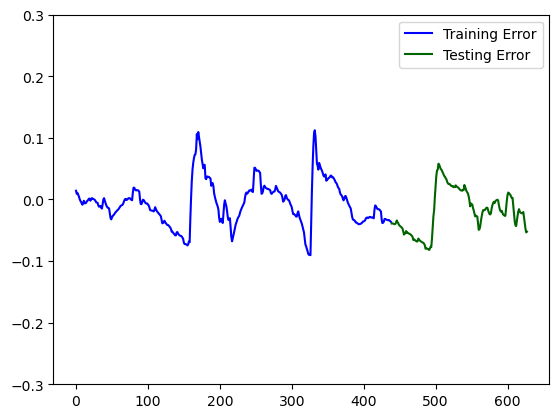

In [121]:

plt.plot(y_train-trainPredict, color = 'blue', label = 'Training Error')
#plt.plot(combined_data-combined_datap, color = 'blue', label = 'Error')
X_data = np.arange(439, 628)
z=np.concatenate((valPredict,testPredict), axis=0)
p=np.concatenate((y_val,y_test), axis=0)
plt.plot(X_data,p-z, color = 'darkgreen', label = 'Testing Error')
yticks_positions = [-0.3, -0.2,-0.1,0.0 ,0.1,0.2,0.3]
#yticks_labels = ['0%', '20%', '40%', '60%', '80%', '100%']

# Apply the yticks
#plt.yticks(yticks_positions, yticks_labels)
plt.yticks(yticks_positions)
plt.legend()
plt.show()  


In [66]:
import tensorflow as tf


model =  regressor



In [67]:
model.save('./saved_model_best')

INFO:tensorflow:Assets written to: ./saved_model_best\assets


INFO:tensorflow:Assets written to: ./saved_model_best\assets
